# Introduction

In this notebook we are lookign to analyse the results of the coding process to get an insight into things such as the influence of the experiment condition on the amount of number based tactics used.

Steps:
1. import relevant data as excel or cvs files
2. plot general overview
3. analyse/compare specific data points

In [1]:
import pandas as pd # good for reading data and manipulating tables of data 
import matplotlib.pyplot as plt # the general plotting library
import numpy as np # for general math stuff
import matplotlib.patches as mpatches
from itertools import cycle, islice


Ok let's start with just one person's code data. From MAXQDA we exported an overview of all codes used during all of vp1's trials, incu

In [2]:
# for just one person 
path = "../data/raw_data/" # + vp + "/code_overview.xlsx"
vp = 'vp_1'
file = path + vp + "/code_overview.xlsx"

codes_vp_1 = pd.read_excel(file)
codes_vp_1

codes  trial1  trial2  trial3  trial4  trial5  trial6  \
0   HYPOTHESE DURCHSPIELEN       0       0       0       0       1       0   
1             AUSPROBIEREN       0       0       0       0       1       0   
2                       CB       0       2       4       4       0       2   
3                       NB       2       0       2       5      13       8   
4       WAS FEHLT IN REIHE       1       0       7       9      11      10   
5                    SUCHE       0       0       0       0       4       1   
6             STAPEL FOKUS       0       1       0       0       0       0   
7             REIHEN FOKUS       0       2       6      10      10      11   
8             ZAHLEN FOKUS       1       4       2       0       4       2   
9          LETZTE IN REIHE       2       4       7       7      10       8   
10          FEHLER BEMERKT       0       1       0       1       1       1   
11                 LÖSCHEN       0       0       0       2       2       0   
12                    META       0       1       3       4       3       1   
13          VERSUCHSLEITER       0       1       0       0       0       0   
14                   SUMME       6      16      31      42      60      44   
15           N = Dokumente       1       1       1       1       1       1   

    trial7  trial8  trial9  Total  
0        4       0       2      7  
1        2       1       2      6  
2        4       4       1     21  
3        5      15       4     54  
4       13       7       3     61  
5        2       1       1      9  
6        1       1       1      4  
7       14      14      16     83  
8        4       4       2     23  
9        8       9       1     56  
10       1       1       0      6  
11       1       1       1      7  
12       3       3       8     26  
13       0       0       1      2  
14      62      61      43    365  
15       1       1       1      9

In [3]:
# let's look at the demographic data
path = "../data/"    
file = path + "Demografischedaten.xlsx"
df_demo = pd.read_excel(file)
df_demo

Experimentleiter  Dateiname/nummer  Kondition  Alter Geschlecht m/w/d  \
0          Isabelle                 1          0     25                m   
1          Isabelle                 2          1     22                w   
2          Isabelle                 3          0     22                w   
3           Fabiola                 4          1     20                m   
4           Fabiola                 5          0     21                w   
5           Fabiola                 6          1     20                w   
6             Lilia                 7          0     27                m   
7             Lilia                 8          1     58                w   
8             Lilia                 9          0     31                m   
9            Katrin                10          1     25                m   
10           Katrin                11          0     54                w   
11           Katrin                12          1     57                m   
12            Janik                13          0     52                m   
13            Janik                14          1     20                w   
14            Janik                15          0     21                w   

    Erfahrung mit Sudoku (-ähnlichen) Rätseln/ Level 1, 2 oder 3:  
0                                                   1              
1                                                   3              
2                                                   2              
3                                                   2              
4                                                   1              
5                                                   1              
6                                                   3              
7                                                   3              
8                                                   2              
9                                                   2              
10                                                  1              
11                                                  3              
12                                                  2              
13                                                  3              
14                                                  3

Now let's import more than one persons data

In [4]:
codes_vp_1["codes"].iloc[0:14].values


array(['HYPOTHESE DURCHSPIELEN', 'AUSPROBIEREN', 'CB', 'NB',
       'WAS FEHLT IN REIHE', 'SUCHE', 'STAPEL FOKUS', 'REIHEN FOKUS',
       'ZAHLEN FOKUS', 'LETZTE IN REIHE', 'FEHLER BEMERKT', 'LÖSCHEN',
       'META', 'VERSUCHSLEITER'], dtype=object)

In [5]:
path = "../data/raw_data/" 
df_list = []
codes = []
ages = []
x = 1
y = 0
ages = [25,22,22,20,21,20,27,58,31,25,54,57,52,20,21]
sex = ['m','f','f','m','f','f','m','f','m','m','f','m','m','f','f']
experience = [1,3,2,2,1,1,3,3,2,2,1,3,2,3,3]
for vp in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:     
    file = path + "vp_" + str(vp) + "/code_overview.xlsx"   
    df_temp = pd.read_excel(file)
    df_temp = df_temp.loc[0:13] # we only want the code rows, not the toal and number of documents
    df_temp['vp_number'] = x #to make it easier to select specific vps later we add ad a vp column
    df_temp['age'] = ages[y]
    df_temp['sex'] = sex[y]
    df_temp['experience'] = experience[y]
    y = y+1
    x=x+1
    if vp%2 == 0: # as well as a column for the two possible conditions
        df_temp['condition']=1
    else: df_temp['condition']=0
    df_list.append(df_temp)
    codes.append("vp_" + str(vp))
    ages.append(ages[y])

df = pd.concat(df_list, keys=codes)
df

codes  trial1  trial2  trial3  trial4  trial5  \
vp_1  0   HYPOTHESE DURCHSPIELEN     0.0     0.0     0.0     0.0     1.0   
      1             AUSPROBIEREN     0.0     0.0     0.0     0.0     1.0   
      2                       CB     0.0     2.0     4.0     4.0     0.0   
      3                       NB     2.0     0.0     2.0     5.0    13.0   
      4       WAS FEHLT IN REIHE     1.0     0.0     7.0     9.0    11.0   
...                          ...     ...     ...     ...     ...     ...   
vp_15 9          LETZTE IN REIHE     6.0     5.0     5.0     6.0     8.0   
      10          FEHLER BEMERKT     0.0     0.0     0.0     0.0     0.0   
      11                 LÖSCHEN     0.0     0.0     0.0     0.0     0.0   
      12                    META     0.0     0.0     0.0     0.0     3.0   
      13          VERSUCHSLEITER     0.0     0.0     1.0     0.0     5.0   

          trial6  trial7  trial8  trial9  Total  vp_number  age sex  \
vp_1  0      0.0     4.0     0.0     2.0    7.0          1   25   m   
      1      0.0     2.0     1.0     2.0    6.0          1   25   m   
      2      2.0     4.0     4.0     1.0   21.0          1   25   m   
      3      8.0     5.0    15.0     4.0   54.0          1   25   m   
      4     10.0    13.0     7.0     3.0   61.0          1   25   m   
...          ...     ...     ...     ...    ...        ...  ...  ..   
vp_15 9      7.0    11.0     NaN     NaN   48.0         15   21   f   
      10     0.0     1.0     NaN     NaN    1.0         15   21   f   
      11     0.0     1.0     NaN     NaN    1.0         15   21   f   
      12     1.0     0.0     NaN     NaN    4.0         15   21   f   
      13     0.0     1.0     NaN     NaN    7.0         15   21   f   

          experience  condition  
vp_1  0            1          0  
      1            1          0  
      2            1          0  
      3            1          0  
      4            1          0  
...              ...        ...  
vp_15 9            3          0  
      10           3          0  
      11           3          0  
      12           3          0  
      13           3          0  

[210 rows x 16 columns]

In [6]:
df = df.fillna(0) #replace NaN with 0 so that plots don't look #whack
df

codes  trial1  trial2  trial3  trial4  trial5  \
vp_1  0   HYPOTHESE DURCHSPIELEN     0.0     0.0     0.0     0.0     1.0   
      1             AUSPROBIEREN     0.0     0.0     0.0     0.0     1.0   
      2                       CB     0.0     2.0     4.0     4.0     0.0   
      3                       NB     2.0     0.0     2.0     5.0    13.0   
      4       WAS FEHLT IN REIHE     1.0     0.0     7.0     9.0    11.0   
...                          ...     ...     ...     ...     ...     ...   
vp_15 9          LETZTE IN REIHE     6.0     5.0     5.0     6.0     8.0   
      10          FEHLER BEMERKT     0.0     0.0     0.0     0.0     0.0   
      11                 LÖSCHEN     0.0     0.0     0.0     0.0     0.0   
      12                    META     0.0     0.0     0.0     0.0     3.0   
      13          VERSUCHSLEITER     0.0     0.0     1.0     0.0     5.0   

          trial6  trial7  trial8  trial9  Total  vp_number  age sex  \
vp_1  0      0.0     4.0     0.0     2.0    7.0          1   25   m   
      1      0.0     2.0     1.0     2.0    6.0          1   25   m   
      2      2.0     4.0     4.0     1.0   21.0          1   25   m   
      3      8.0     5.0    15.0     4.0   54.0          1   25   m   
      4     10.0    13.0     7.0     3.0   61.0          1   25   m   
...          ...     ...     ...     ...    ...        ...  ...  ..   
vp_15 9      7.0    11.0     0.0     0.0   48.0         15   21   f   
      10     0.0     1.0     0.0     0.0    1.0         15   21   f   
      11     0.0     1.0     0.0     0.0    1.0         15   21   f   
      12     1.0     0.0     0.0     0.0    4.0         15   21   f   
      13     0.0     1.0     0.0     0.0    7.0         15   21   f   

          experience  condition  
vp_1  0            1          0  
      1            1          0  
      2            1          0  
      3            1          0  
      4            1          0  
...              ...        ...  
vp_15 9            3          0  
      10           3          0  
      11           3          0  
      12           3          0  
      13           3          0  

[210 rows x 16 columns]

In [7]:
df_condition_0 = df[df.condition==0] # here we have all vps with the condition 0
df_condition_0

codes  trial1  trial2  trial3  trial4  trial5  \
vp_1  0   HYPOTHESE DURCHSPIELEN     0.0     0.0     0.0     0.0     1.0   
      1             AUSPROBIEREN     0.0     0.0     0.0     0.0     1.0   
      2                       CB     0.0     2.0     4.0     4.0     0.0   
      3                       NB     2.0     0.0     2.0     5.0    13.0   
      4       WAS FEHLT IN REIHE     1.0     0.0     7.0     9.0    11.0   
...                          ...     ...     ...     ...     ...     ...   
vp_15 9          LETZTE IN REIHE     6.0     5.0     5.0     6.0     8.0   
      10          FEHLER BEMERKT     0.0     0.0     0.0     0.0     0.0   
      11                 LÖSCHEN     0.0     0.0     0.0     0.0     0.0   
      12                    META     0.0     0.0     0.0     0.0     3.0   
      13          VERSUCHSLEITER     0.0     0.0     1.0     0.0     5.0   

          trial6  trial7  trial8  trial9  Total  vp_number  age sex  \
vp_1  0      0.0     4.0     0.0     2.0    7.0          1   25   m   
      1      0.0     2.0     1.0     2.0    6.0          1   25   m   
      2      2.0     4.0     4.0     1.0   21.0          1   25   m   
      3      8.0     5.0    15.0     4.0   54.0          1   25   m   
      4     10.0    13.0     7.0     3.0   61.0          1   25   m   
...          ...     ...     ...     ...    ...        ...  ...  ..   
vp_15 9      7.0    11.0     0.0     0.0   48.0         15   21   f   
      10     0.0     1.0     0.0     0.0    1.0         15   21   f   
      11     0.0     1.0     0.0     0.0    1.0         15   21   f   
      12     1.0     0.0     0.0     0.0    4.0         15   21   f   
      13     0.0     1.0     0.0     0.0    7.0         15   21   f   

          experience  condition  
vp_1  0            1          0  
      1            1          0  
      2            1          0  
      3            1          0  
      4            1          0  
...              ...        ...  
vp_15 9            3          0  
      10           3          0  
      11           3          0  
      12           3          0  
      13           3          0  

[112 rows x 16 columns]

For most of our analysis we probably want to look at the codes across all vps so we group multiple vps by these codes ussing groupby. You can choose either mean() or sum() across all trials depending on what data you're looking for. Total indicates you're looking at for example the sum across all trials, however you could also choose a specific trial to compare across all vps.

In [8]:
df.groupby('codes').Total.mean()

codes
AUSPROBIEREN              12.466667
CB                        13.933333
FEHLER BEMERKT             6.066667
HYPOTHESE DURCHSPIELEN     7.666667
LETZTE IN REIHE           45.933333
LÖSCHEN                    4.533333
META                      28.733333
NB                        35.666667
REIHEN FOKUS              69.800000
STAPEL FOKUS               5.000000
SUCHE                     14.466667
VERSUCHSLEITER             6.266667
WAS FEHLT IN REIHE        37.266667
ZAHLEN FOKUS              34.333333
Name: Total, dtype: float64

Text(0, 0.5, 'average amount of times applied')

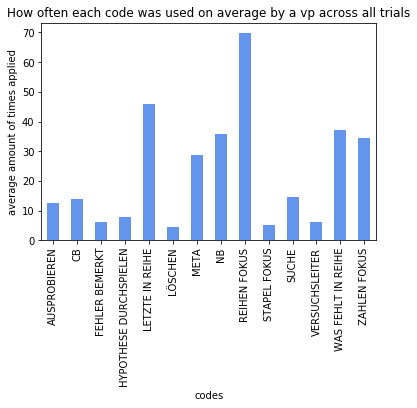

In [9]:
df.groupby('codes').Total.mean().plot.bar(color='cornflowerblue') #plotting the information from above
plt.title('How often each code was used on average by a vp across all trials')
plt.ylabel('average amount of times applied')

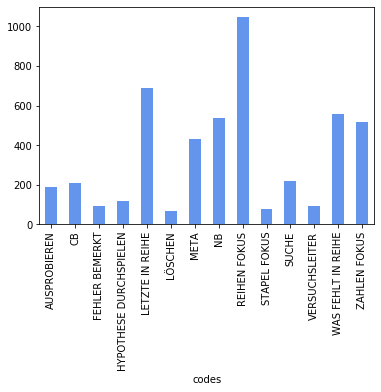

In [10]:
df.groupby('codes').Total.sum().plot.bar(color='cornflowerblue') #plotting the information from above

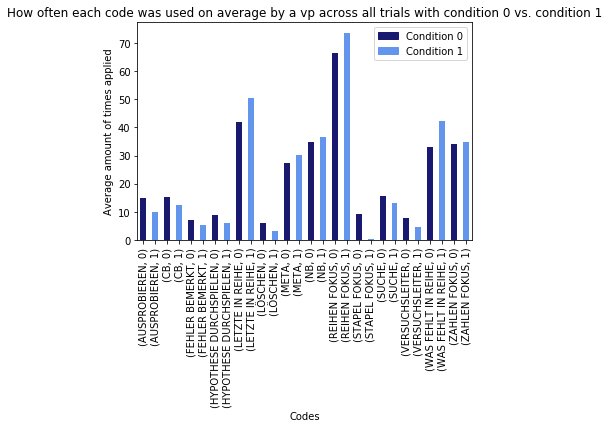

In [11]:
#choosing colours to have a disticntion between the two conditions 
my_colors = list(islice(cycle(['purple', 'mediumseagreen']), None, len(df)))
my_colors = list(islice(cycle(['midnightblue', 'cornflowerblue']), None, len(df))) 
#we can also group by mutliple parameters, such as codes and condition, in this case the mean across all trials and across all vps 
df.groupby(['codes','condition']).Total.mean().plot.bar(color=my_colors, legend=True)
plt.title('How often each code was used on average by a vp across all trials with condition 0 vs. condition 1')
plt.ylabel('Average amount of times applied')
plt.xlabel('Codes')
first_patch = mpatches.Patch(color='midnightblue', label='Condition 0')
scnd_patch = mpatches.Patch(color='cornflowerblue', label='Condition 1')
plt.legend(handles=[first_patch,scnd_patch])
#still need a better legend tho

In [12]:
df[df['codes']=='NB'].Total.sum() #looking at how often a specific code was used

535.0

In [13]:
df.loc['vp_1'].Total.plot() # same plot as before (how often a code was used over all trials) but now taken from the full dataframe

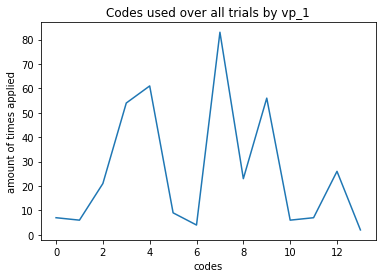

In [14]:
# same as in the cell above, but now we make the plot a little prettier!
# adding a title, labels for the axes
vp = 'vp_1' # you can change the participant here if you like
df.loc[vp].Total.plot() 
plt.title('Codes used over all trials by ' + vp)
plt.xlabel('codes')
plt.ylabel('amount of times applied')
plt.show()

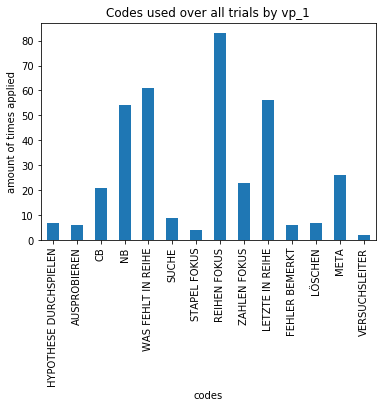

In [15]:
vp = 'vp_1' 
df.loc[vp].Total.plot.bar() #this time as bars cause it kinda makes more sense for this data
plt.title('Codes used over all trials by ' + vp)
plt.xticks(range(14),codes_vp_1["codes"].iloc[0:14].values,rotation=90)
plt.xlabel('codes')
plt.ylabel('amount of times applied')
plt.show()

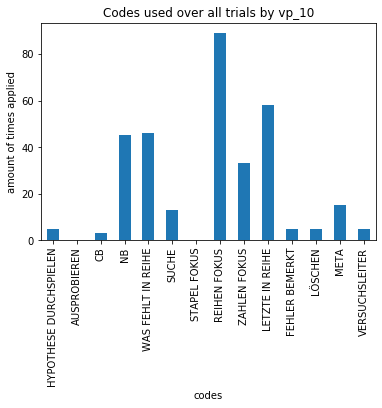

In [16]:
vp = 'vp_10' 
df.loc[vp].Total.plot.bar() #this time as bars cause it kinda makes more sense for this data
plt.title('Codes used over all trials by ' + vp)
plt.xticks(range(14),codes_vp_1["codes"].iloc[0:14].values,rotation=90)
plt.xlabel('codes')
plt.ylabel('amount of times applied')
plt.show()

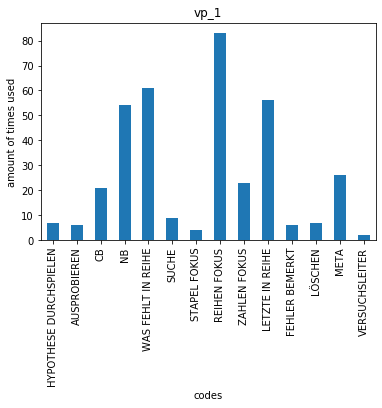

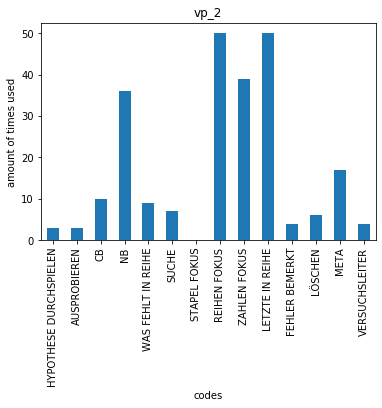

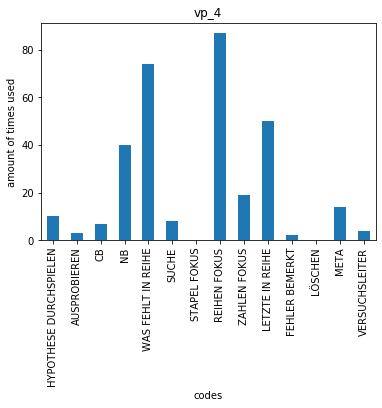

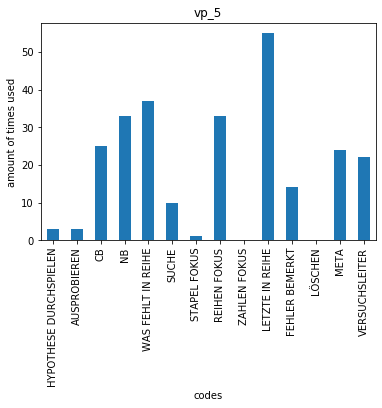

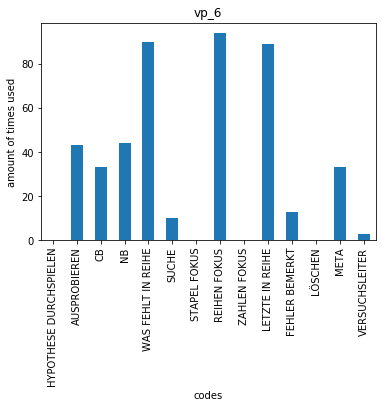

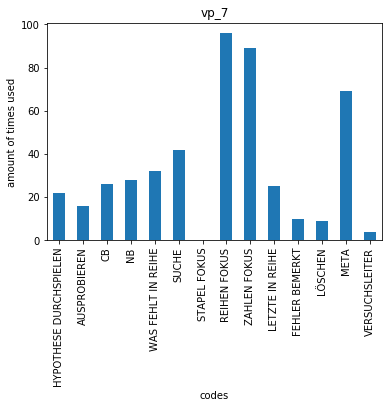

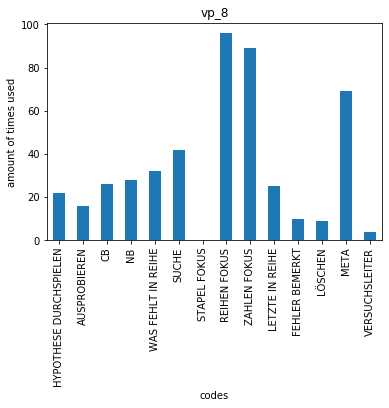

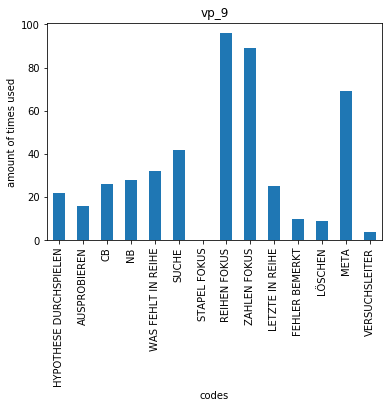

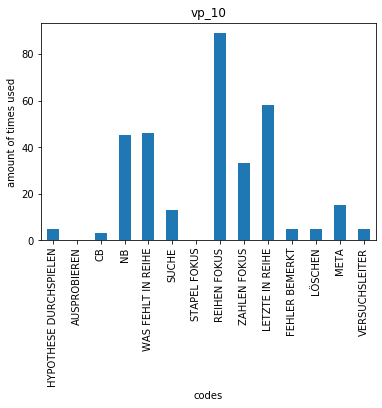

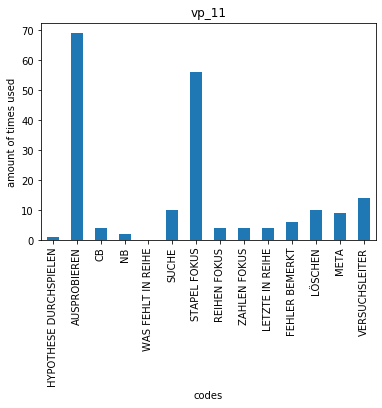

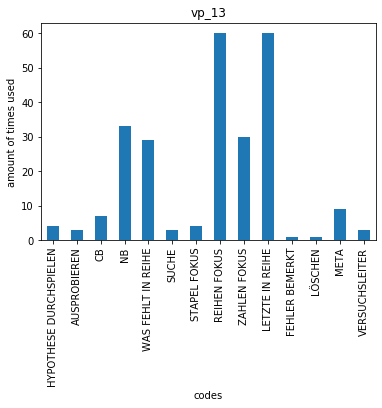

In [17]:
# alle einzeln untereinander
for code in codes:
    df.loc[code].Total.iloc[0:14].plot.bar()
    plt.title(code)
    plt.xticks(range(14),codes_vp_1["codes"].iloc[0:14].values,rotation=90)
    plt.xlabel('codes')
    plt.ylabel('amount of times used')
    plt.show()

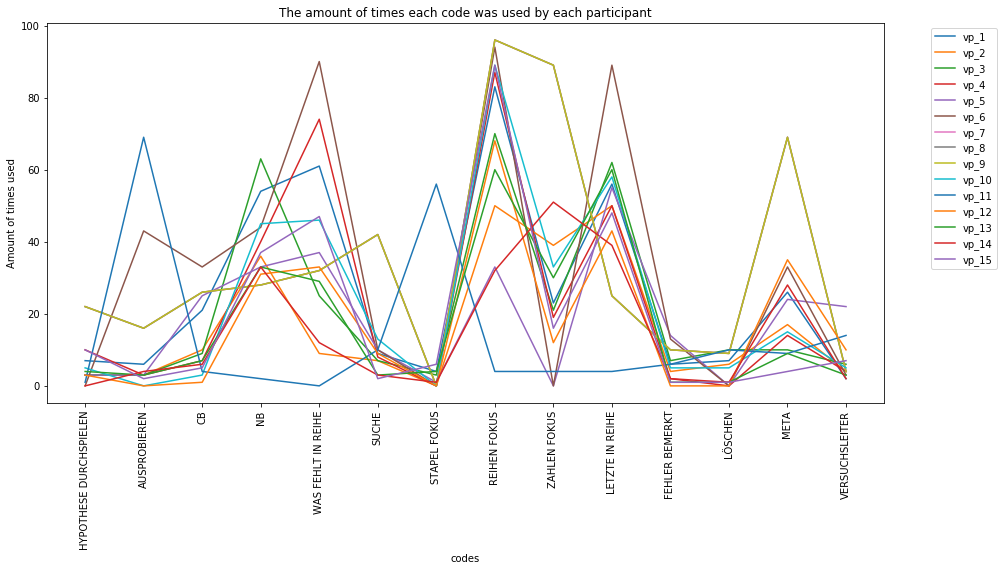

In [18]:
# can plot them all in the same plot 
# first: create an empty plot (I also made it a little bigger than default)
fig, ax = plt.subplots(1, figsize=(15,7))
line = '-'
for code in codes:
    # need to give the plot as an argument here, for a legend, specify what name to associate with each line
    df.loc[code].Total.iloc[0:14].plot(ax=ax, label=code, style=line)

# making the plot prettier does not need to be done in the loop, its enough to do it once at the end 
plt.title('The amount of times each code was used by each participant')
plt.xticks(range(14),codes_vp_1["codes"].iloc[0:14].values,rotation=90)
plt.xlabel('codes')

plt.ylabel('Amount of times used')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Let's look at more specific data such as number based versus cell based inputs. First for one vp and the  over all combined.

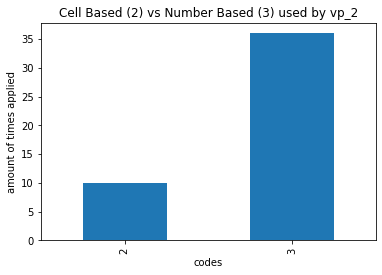

In [19]:
vp = 'vp_1' # you can change the participant here if you like
df.loc[vp].Total.loc[2:3].plot.bar() 
plt.title('Cell Based (2) vs Number Based (3) used by ' + vp)
plt.xlabel('codes')
plt.ylabel('amount of times applied')
plt.show()
vp = 'vp_2' # you can change the participant here if you like
df.loc[vp].Total.loc[2:3].plot.bar() 
plt.title('Cell Based (2) vs Number Based (3) used by ' + vp)
plt.xlabel('codes')
plt.ylabel('amount of times applied')
plt.show()

Now it'd be better to have the both in the same graph but i don't know how

In [20]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.bar(np.arange(2)-0.2,df.loc['vp_1'].Total.loc[2:3],width=0.4,label='vp1')
ax.bar(np.arange(2)+0.2,df.loc['vp_2'].Total.loc[2:3],width=0.4, color = 'red',label='vp2')   
    
plt.title('Cell Based (2) vs Number Based (3) used over all vps ')
plt.xlabel('codes')
plt.ylabel('amount of times applied')
plt.legend()
plt.show()

Text(0, 0.5, 'amount of times applied')

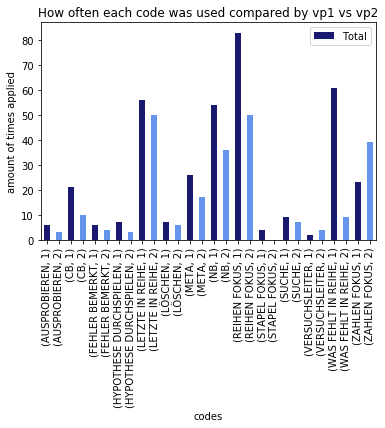

In [21]:
vp_list = ['vp_1','vp_2'] #choose vps to compare
df_vp = df.loc[vp_list]
df_vp.groupby(['codes','vp_number']).Total.mean().plot.bar(color=my_colors, legend=True)
plt.title('How often each code was used compared by vp1 vs vp2')
plt.xlabel('codes')
plt.ylabel('amount of times applied')

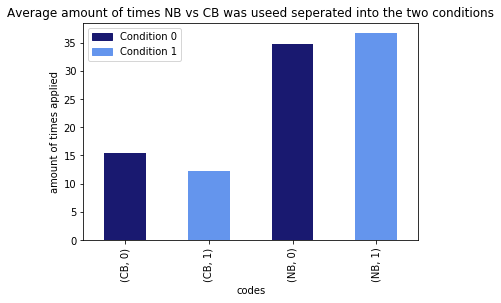

In [22]:
df_nb_cb = df[(df['codes'] == 'NB')| (df['codes'] == 'CB')] #choose codes we wanna look at
df_nb_cb.groupby(['codes','condition']).Total.mean().plot.bar(color=my_colors, legend=True)
plt.title('Average amount of times NB vs CB was useed seperated into the two conditions')
plt.xlabel('codes')
plt.ylabel('amount of times applied')
first_patch = mpatches.Patch(color='midnightblue', label='Condition 0')
scnd_patch = mpatches.Patch(color='cornflowerblue', label='Condition 1')
plt.legend(handles=[first_patch,scnd_patch])

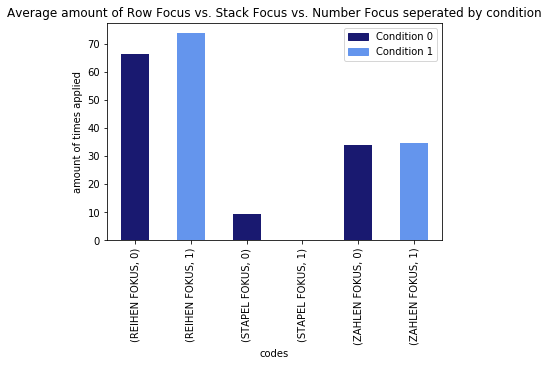

In [23]:
df_fokus = df[(df['codes'] == 'ZAHLEN FOKUS')| (df['codes'] == 'REIHEN FOKUS') | (df['codes'] == 'STAPEL FOKUS')] #choose codes we wanna look at
df_fokus.groupby(['codes','condition']).Total.mean().plot.bar(color=my_colors, legend=True)
plt.title('Average amount of Row Focus vs. Stack Focus vs. Number Focus seperated by condition')
plt.xlabel('codes')
plt.ylabel('amount of times applied')
first_patch = mpatches.Patch(color='midnightblue', label='Condition 0')
scnd_patch = mpatches.Patch(color='cornflowerblue', label='Condition 1')
plt.legend(handles=[first_patch,scnd_patch])

## Ok lets see what I want. 
1. Import Data from demografische Daten and add to df
2. check if experience, age or gender have an influence on nb/cb?


In [24]:
df_nb_cb = df[(df['codes'] == 'NB')| (df['codes'] == 'CB')] #choose codes we wanna look at
df_nb_cb.groupby(['codes','sex']).Total.mean().plot.bar(color=my_colors, legend=True)
plt.title('Durchschnittliche Anzahl NB vs. CB aufgeteilt nach Geschlecht')
plt.xlabel('codes')
plt.ylabel('amount of times applied')

Text(0, 0.5, 'amount of times applied')

In [25]:

df_fokus = df[(df['codes'] == 'ZAHLEN FOKUS')| (df['codes'] == 'REIHEN FOKUS') | (df['codes'] == 'STAPEL FOKUS')] #choose codes we wanna look at
df_fokus.groupby(['codes','sex']).Total.mean().plot.bar(color=my_colors, legend=True)
plt.title('Durchschnittliche Anzahl Reihen Fokus vs. Stapel Fokus vs. Zahlen Fokus aufgeteilt nach Geschlecht')
plt.xlabel('codes')
plt.ylabel('amount of times applied')

Text(0, 0.5, 'amount of times applied')

C:\Users\Isabelle\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'amount of times applied')

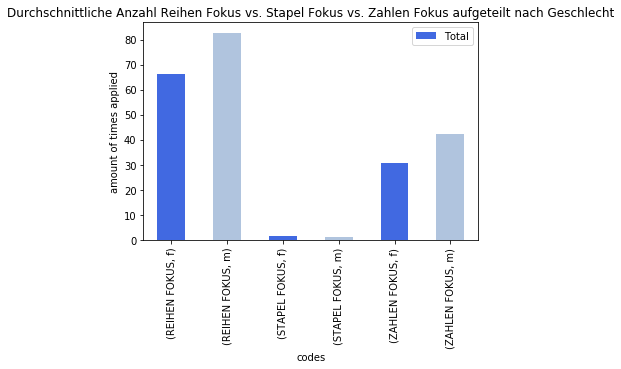

In [38]:
vplist = ['vp_1','vp_2','vp_2','vp_3','vp_4','vp_5','vp_6','vp_7','vp_8','vp_9','vp_10','vp_12','vp_13','vp_14','vp_15']
df_vp = df.loc[vplist]
df_fokus = df_vp[(df['codes'] == 'ZAHLEN FOKUS')| (df['codes'] == 'REIHEN FOKUS') | (df['codes'] == 'STAPEL FOKUS')] #choose codes we wanna look at
df_fokus.groupby(['codes','sex']).Total.mean().plot.bar(color=my_colors, legend=True)
plt.title('Durchschnittliche Anzahl Reihen Fokus vs. Stapel Fokus vs. Zahlen Fokus aufgeteilt nach Geschlecht')
plt.xlabel('codes')
plt.ylabel('amount of times applied')

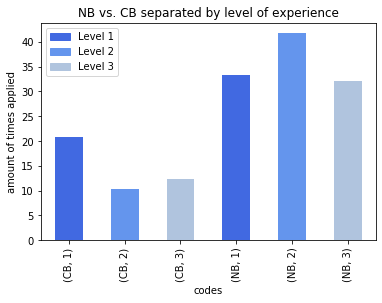

In [26]:
my_colors_blue = list(islice(cycle(['royalblue', 'cornflowerblue','lightsteelblue']), None, len(df))) 
df_nb_cb = df[(df['codes'] == 'NB')| (df['codes'] == 'CB')] #choose codes we wanna look at
df_nb_cb.groupby(['codes','experience']).Total.mean().plot.bar(color=my_colors_blue, legend=True)
plt.title('NB vs. CB separated by level of experience')
plt.xlabel('codes')
plt.ylabel('amount of times applied')
first_patch = mpatches.Patch(color='royalblue', label='Level 1')
scnd_patch = mpatches.Patch(color='cornflowerblue', label='Level 2')
third_patch = mpatches.Patch(color='lightsteelblue', label='Level 3')
plt.legend(handles=[first_patch,scnd_patch,third_patch])


In [27]:
df_nb_cb.groupby(['codes','experience']).Total.sum()

codes  experience
CB     1              83.0
       2              52.0
       3              74.0
NB     1             133.0
       2             209.0
       3             193.0
Name: Total, dtype: float64

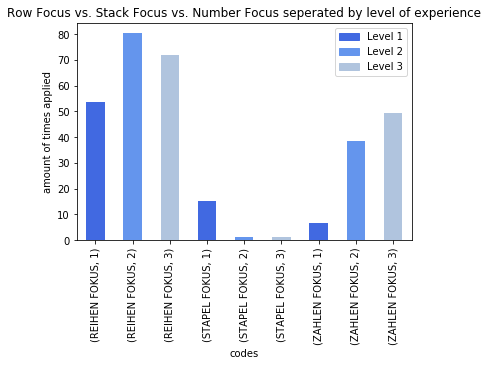

In [28]:
my_colors_blue = list(islice(cycle(['royalblue', 'cornflowerblue','lightsteelblue']), None, len(df))) 
df_nb_cb = df[(df['codes'] == 'ZAHLEN FOKUS')| (df['codes'] == 'REIHEN FOKUS') | (df['codes'] == 'STAPEL FOKUS')] #choose codes we wanna look at
df_nb_cb.groupby(['codes','experience']).Total.mean().plot.bar(color=my_colors_blue, legend=True)
plt.title('Row Focus vs. Stack Focus vs. Number Focus seperated by level of experience')
plt.xlabel('codes')
plt.ylabel('amount of times applied')
first_patch = mpatches.Patch(color='royalblue', label='Level 1')
scnd_patch = mpatches.Patch(color='cornflowerblue', label='Level 2')
third_patch = mpatches.Patch(color='lightsteelblue', label='Level 3')
plt.legend(handles=[first_patch,scnd_patch,third_patch])

C:\Users\Isabelle\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


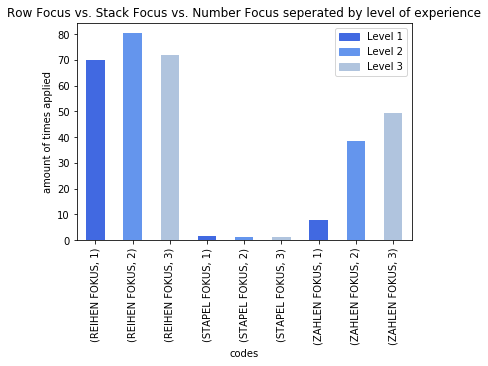

In [40]:
vplist = ['vp_1','vp_2','vp_2','vp_3','vp_4','vp_5','vp_6','vp_7','vp_8','vp_9','vp_10','vp_12','vp_13','vp_14','vp_15']
my_colors_blue = list(islice(cycle(['royalblue', 'cornflowerblue','lightsteelblue']), None, len(df))) 
df_vp = df.loc[vplist]
df_nb_cb = df_vp[(df['codes'] == 'ZAHLEN FOKUS')| (df['codes'] == 'REIHEN FOKUS') | (df['codes'] == 'STAPEL FOKUS')] #choose codes we wanna look at
df_nb_cb.groupby(['codes','experience']).Total.mean().plot.bar(color=my_colors_blue, legend=True)
plt.title('Row Focus vs. Stack Focus vs. Number Focus seperated by level of experience')
plt.xlabel('codes')
plt.ylabel('amount of times applied')
first_patch = mpatches.Patch(color='royalblue', label='Level 1')
scnd_patch = mpatches.Patch(color='cornflowerblue', label='Level 2')
third_patch = mpatches.Patch(color='lightsteelblue', label='Level 3')
plt.legend(handles=[first_patch,scnd_patch,third_patch])

Text(0, 0.5, 'amount of times applied')

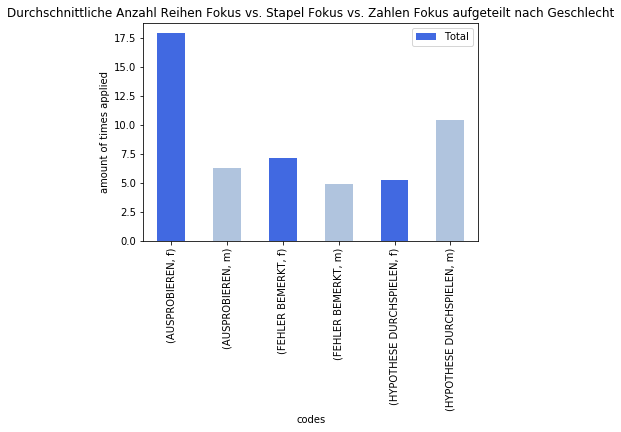

In [29]:
my_colors = list(islice(cycle(['royalblue','lightsteelblue']), None, len(df))) 
df_fokus = df[(df['codes'] == 'HYPOTHESE DURCHSPIELEN')| (df['codes'] == 'AUSPROBIEREN') | (df['codes'] == 'FEHLER BEMERKT')] #choose codes we wanna look at
df_fokus.groupby(['codes','sex']).Total.mean().plot.bar(color=my_colors, legend=True)
plt.title('Durchschnittliche Anzahl Reihen Fokus vs. Stapel Fokus vs. Zahlen Fokus aufgeteilt nach Geschlecht')
plt.xlabel('codes')
plt.ylabel('amount of times applied')

In [30]:
my_colors_blue = list(islice(cycle(['royalblue', 'cornflowerblue','lightsteelblue']), None, len(df))) 
df_fokus = df[(df['codes'] == 'AUSPROBIEREN')] #choose codes we wanna look at
df_fokus.groupby(['codes','experience']).Total.mean().plot.bar(color=my_colors_blue, legend=True)
plt.title('Average amount of guessing separated into experience levels')
plt.xlabel('codes')
plt.ylabel('amount of times applied')
first_patch = mpatches.Patch(color='royalblue', label='Level 1')
scnd_patch = mpatches.Patch(color='cornflowerblue', label='Level 2')
third_patch = mpatches.Patch(color='lightsteelblue', label='Level 3')
plt.legend(handles=[first_patch,scnd_patch,third_patch])

In [31]:
vplist = ['vp_1','vp_2','vp_2','vp_3','vp_4','vp_5','vp_6','vp_7','vp_8','vp_9','vp_10','vp_12','vp_13','vp_14','vp_15']
my_colors_blue = list(islice(cycle(['royalblue', 'cornflowerblue','lightsteelblue']), None, len(df))) 
df_vp = df.loc[vplist]
df_fokus = df_vp[(df['codes'] == 'AUSPROBIEREN')] #choose codes we wanna look at
df_fokus.groupby(['codes','experience']).Total.mean().plot.bar(color=my_colors_blue, legend=True)
plt.title('Average amount of guessing separated into experience levels, excluding vp11')
plt.xlabel('codes')
plt.ylabel('amount of times applied')
first_patch = mpatches.Patch(color='royalblue', label='Level 1')
scnd_patch = mpatches.Patch(color='cornflowerblue', label='Level 2')
third_patch = mpatches.Patch(color='lightsteelblue', label='Level 3')
plt.legend(handles=[first_patch,scnd_patch,third_patch])

C:\Users\Isabelle\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Text(0, 0.5, 'amount of times applied')

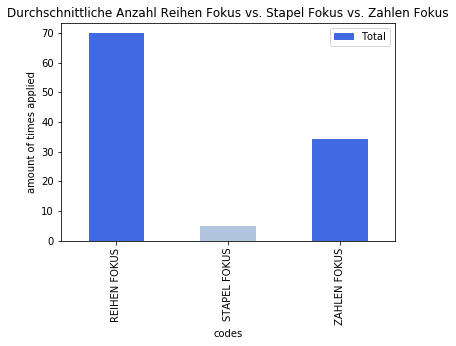

In [32]:
df_fokus = df[(df['codes'] == 'ZAHLEN FOKUS')| (df['codes'] == 'REIHEN FOKUS') | (df['codes'] == 'STAPEL FOKUS')] #choose codes we wanna look at
df_fokus.groupby(['codes']).Total.mean().plot.bar(color=my_colors, legend=True)
plt.title('Durchschnittliche Anzahl Reihen Fokus vs. Stapel Fokus vs. Zahlen Fokus')
plt.xlabel('codes')
plt.ylabel('amount of times applied')

Text(0, 0.5, 'amount of times applied')

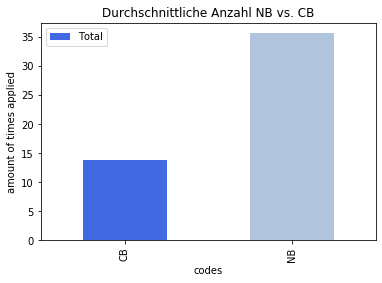

In [33]:
df_nb_cb = df[(df['codes'] == 'NB')| (df['codes'] == 'CB')] #choose codes we wanna look at
df_nb_cb.groupby(['codes']).Total.mean().plot.bar(color=my_colors, legend=True)
plt.title('Durchschnittliche Anzahl NB vs. CB')
plt.xlabel('codes')
plt.ylabel('amount of times applied')

In [34]:
df_nb = df[(df['codes'] == 'NB')]
df_cb = df[(df['codes'] == 'CB')]
df_nb = df_nb[['trial1','trial2','trial3','trial4','trial5','trial6','trial7','trial8','trial9']]
df_cb = df_cb[['trial1','trial2','trial3','trial4','trial5','trial6','trial7','trial8','trial9']]
df_nb


trial1  trial2  trial3  trial4  trial5  trial6  trial7  trial8  \
vp_1  3     2.0     0.0     2.0     5.0    13.0     8.0     5.0    15.0   
vp_2  3     0.0     2.0     1.0     5.0     6.0    13.0     9.0     0.0   
vp_3  3     1.0     0.0     5.0     6.0    11.0    10.0     9.0     6.0   
vp_4  3     0.0     1.0     3.0     8.0     8.0    14.0     6.0     0.0   
vp_5  3     1.0     3.0     4.0     4.0     9.0     8.0     4.0     0.0   
vp_6  3     0.0     0.0     2.0     4.0     5.0    10.0     2.0     7.0   
vp_7  3     2.0     3.0     3.0     1.0     1.0     2.0     6.0     5.0   
vp_8  3     2.0     3.0     3.0     1.0     1.0     2.0     6.0     5.0   
vp_9  3     2.0     3.0     3.0     1.0     1.0     2.0     6.0     5.0   
vp_10 3     0.0     2.0     6.0     8.0    11.0    18.0     0.0     0.0   
vp_11 3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
vp_12 3     0.0     1.0     6.0     8.0     3.0    13.0     0.0     0.0   
vp_13 3     1.0     0.0     5.0     7.0     5.0     9.0     6.0     0.0   
vp_14 3     0.0     1.0     3.0     6.0     6.0    11.0     6.0     0.0   
vp_15 3     0.0     2.0     5.0     5.0     5.0    12.0     8.0     0.0   

         trial9  
vp_1  3     4.0  
vp_2  3     0.0  
vp_3  3    15.0  
vp_4  3     0.0  
vp_5  3     0.0  
vp_6  3    14.0  
vp_7  3     5.0  
vp_8  3     5.0  
vp_9  3     5.0  
vp_10 3     0.0  
vp_11 3     0.0  
vp_12 3     0.0  
vp_13 3     0.0  
vp_14 3     0.0  
vp_15 3     0.0

In [35]:
df_cb

trial1  trial2  trial3  trial4  trial5  trial6  trial7  trial8  \
vp_1  2     0.0     2.0     4.0     4.0     0.0     2.0     4.0     4.0   
vp_2  2     0.0     0.0     4.0     1.0     3.0     0.0     2.0     0.0   
vp_3  2     0.0     1.0     1.0     0.0     2.0     2.0     1.0     2.0   
vp_4  2     0.0     1.0     3.0     0.0     0.0     0.0     3.0     0.0   
vp_5  2     0.0     0.0     2.0     7.0     3.0     5.0     8.0     0.0   
vp_6  2     0.0     3.0     4.0     3.0     2.0     4.0     6.0     2.0   
vp_7  2     2.0     0.0     2.0     3.0     2.0     4.0     3.0     2.0   
vp_8  2     2.0     0.0     2.0     3.0     2.0     4.0     3.0     2.0   
vp_9  2     2.0     0.0     2.0     3.0     2.0     4.0     3.0     2.0   
vp_10 2     0.0     0.0     0.0     0.0     1.0     2.0     0.0     0.0   
vp_11 2     1.0     0.0     0.0     3.0     0.0     0.0     0.0     0.0   
vp_12 2     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
vp_13 2     0.0     1.0     1.0     0.0     2.0     1.0     2.0     0.0   
vp_14 2     0.0     0.0     2.0     0.0     1.0     0.0     3.0     0.0   
vp_15 2     0.0     1.0     0.0     0.0     1.0     0.0     3.0     0.0   

         trial9  
vp_1  2     1.0  
vp_2  2     0.0  
vp_3  2     0.0  
vp_4  2     0.0  
vp_5  2     0.0  
vp_6  2     9.0  
vp_7  2     8.0  
vp_8  2     8.0  
vp_9  2     8.0  
vp_10 2     0.0  
vp_11 2     0.0  
vp_12 2     0.0  
vp_13 2     0.0  
vp_14 2     0.0  
vp_15 2     0.0

Text(0, 0.5, 'amount of times applied')

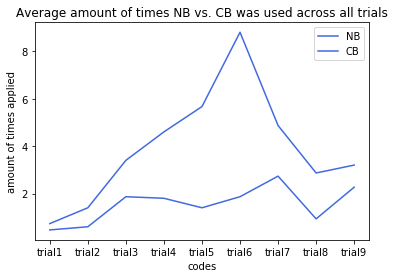

In [36]:
df_nb.mean().plot(color=my_colors, legend=True, label = 'NB')
df_cb.mean().plot(color='royalblue',legend=True, label = 'CB')
plt.title('Average amount of times NB vs. CB was used across all trials')
plt.xlabel('codes')
plt.ylabel('amount of times applied')